## Lineplots
Lineplots usually connect values by time. Users often need to specify groups\
and do some data preparation to ensure separate lines are drawn\
Replace _ to complete expressions and return the correct answer\
Restart R to remove previous results using: Ctrl/Cmd + shift + F1\
Remember - try to use google to help you answer question\
data |> \
ggplot(aes(x = x_variable, y = y_variable, group = group_column)) +\
geom_line(\
Load the tidyverse package


In [164]:
library(tidyverse)

### 1. Line plots
madrid-weather-monthly-2010-2020.csv contains daily temperature, humidity and\
precipitation every two years from 2010 to 2020.\
We want to create a plot of monthly mean temperature across different years.

#### 1.1 Import madrid-weather-monthly-2010-2020.csv from teh data folder

In [165]:
madrid_weather <-
  readr::read_csv(file = "../data/madrid-weather-monthly-2010-2020.csv")

Rows: 2193 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): year, month, day, Temperature_C, Humidity_pct, Precipitation_mm

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Examine the first 10 rows of the data

In [166]:
madrid_weather |> head(n = 10)

year,month,day,Temperature_C,Humidity_pct,Precipitation_mm
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2010,1,1,5,85,1.2
2010,1,2,5,90,0.0
2010,1,3,4,95,8.9
2010,1,4,6,96,24.4
2010,1,5,8,91,4.2
2010,1,6,4,86,0.5
2010,1,7,1,89,7.5
2010,1,8,0,67,0.7
2010,1,9,-1,70,0.5


Create a new dataset that is the mean temperature by year and month\
That is, summarise Temperature_C by year and month.

In [167]:
madrid_weather_monthly <-
  madrid_weather |>
  group_by(year, month) |>
  summarise(
    mean_temp = mean(Temperature_C, na.rm = TRUE)
  )

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


#### 1.2 Create a line plot
Create a line plot of monthly temperatures for each year in the dataset\
use the group= argument to create different lines

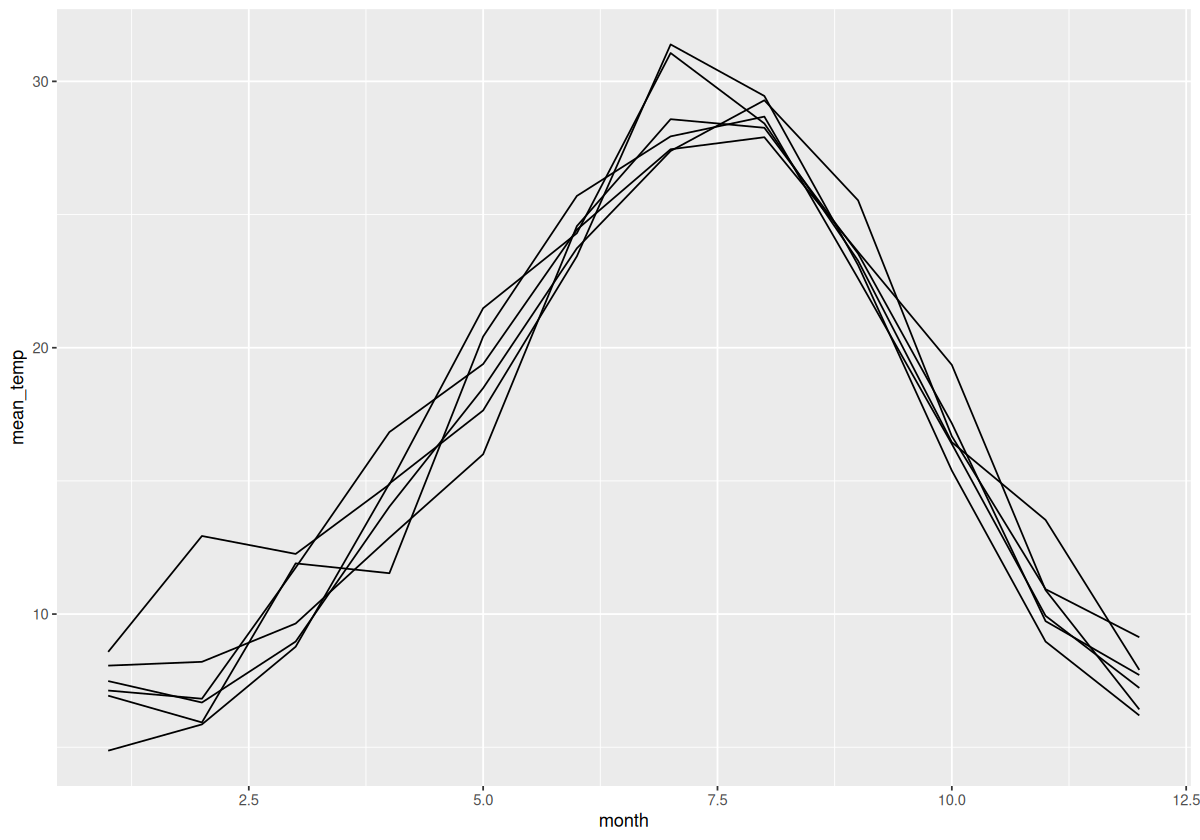

In [168]:
madrid_weather_monthly |>
  ggplot(aes(x = month, y = mean_temp, group = year)) +
  geom_line()

Try using the colour aesthetic instead of group

Rows: 72
Columns: 3
Groups: year [6]
$ year      <dbl> 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, …
$ month     <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ mean_temp <dbl> 4.870968, 5.857143, 8.774194, 14.900000, 17.645161, 23.43333…


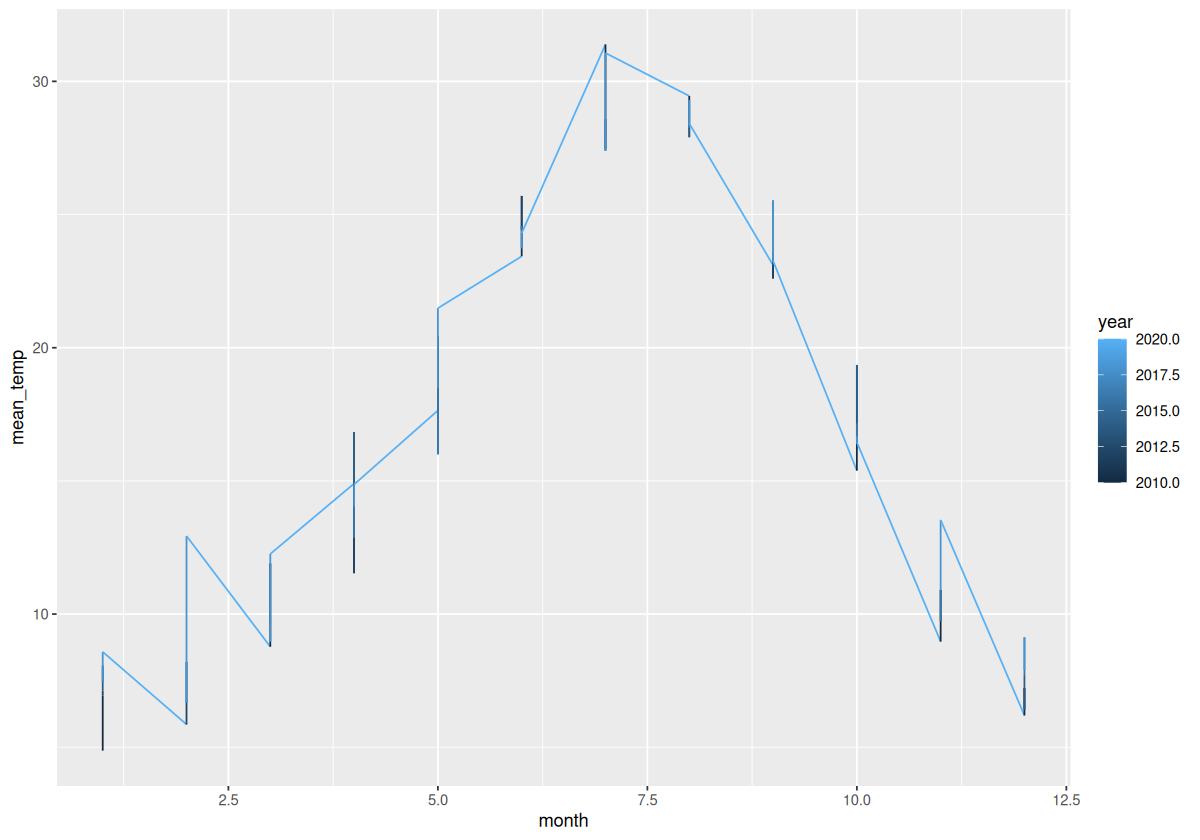

In [169]:
glimpse(madrid_weather_monthly)
madrid_weather_monthly |>
  ggplot(aes(x = month, y = mean_temp, colour = year)) +
  geom_line()

Is the result what you were expecting?\
***-> No, it represents all the years in the same series***\
What type of column is year?\
***-> It is <dbl> type. It should be <int> or <chr>***\
How can you make a grouping data type from a column like year that has numbers?\
***->By turning it into a factor type.***

In [170]:
madrid_weather_monthly <-
  madrid_weather_monthly |>
  mutate(year = factor(year))

Rows: 72
Columns: 3
Groups: year [6]
$ year      <fct> 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, …
$ month     <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ mean_temp <dbl> 4.870968, 5.857143, 8.774194, 14.900000, 17.645161, 23.43333…


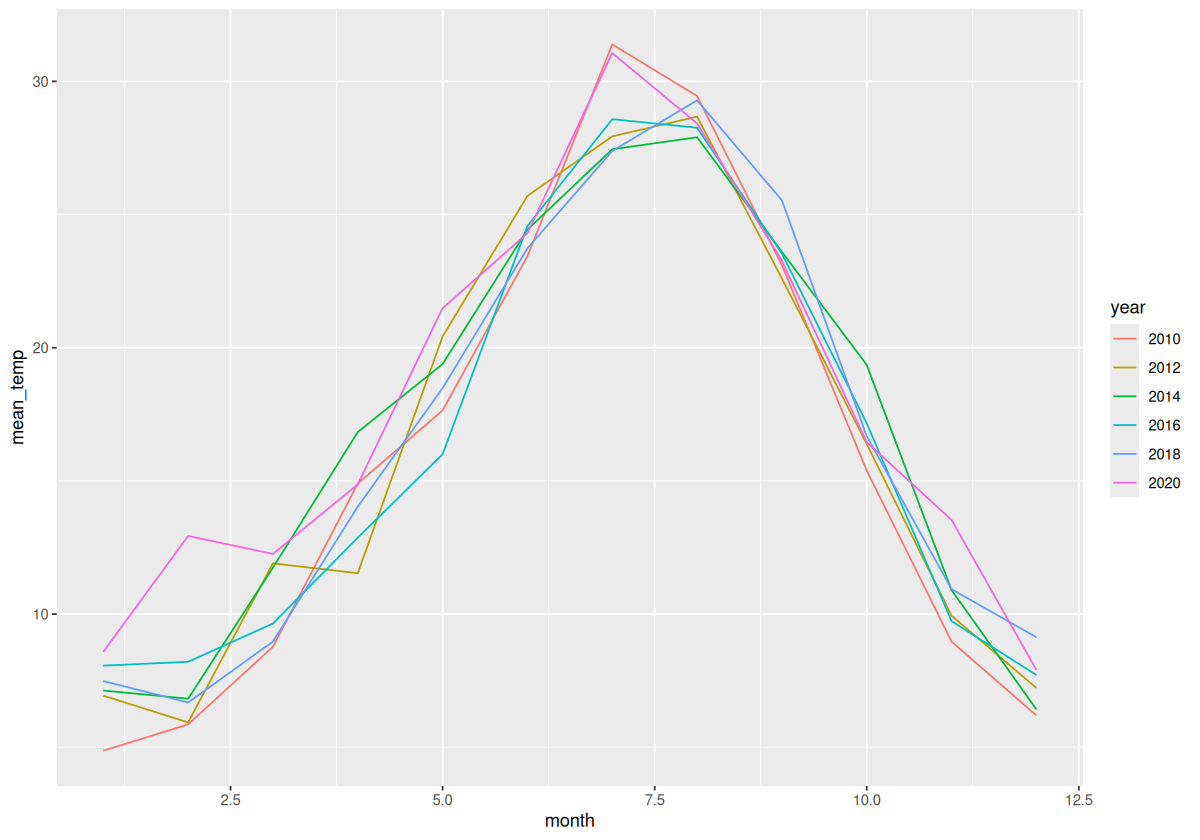

In [171]:
glimpse(madrid_weather_monthly)
madrid_weather_monthly |>
  ggplot(aes(x = month, y = mean_temp, colour = year)) +
  geom_line()

#### 1.3 Edit the x axis breaks
We want to make the values on the x axis the numbers of the month\
Use scale_x_continuous() to update the "breaks" to be 1 to 12.

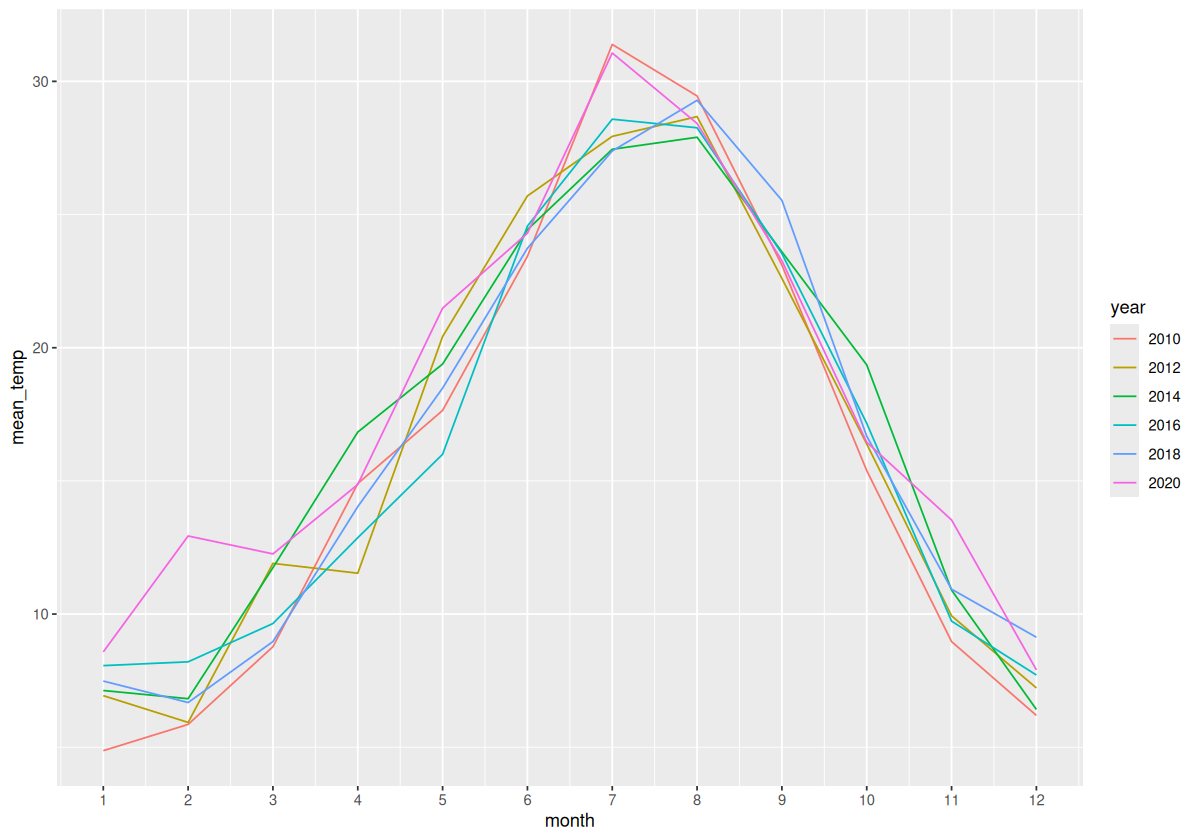

In [172]:
madrid_weather_monthly |>
  ggplot(aes(x = month, y = mean_temp, colour = year)) +
  geom_line() +
  scale_x_continuous(breaks = seq(from = 1, to = 12, by = 1))

#### 1.4 Change the x axis labels
We can further provide what values should go at the 12 axis breaks\
R includes some vectors "constants", including the names of the months\
?Constants\
Update scale_x_continuous to include the labels argument with the month.abb vector\
This will put the values of month.abb at the given breaks

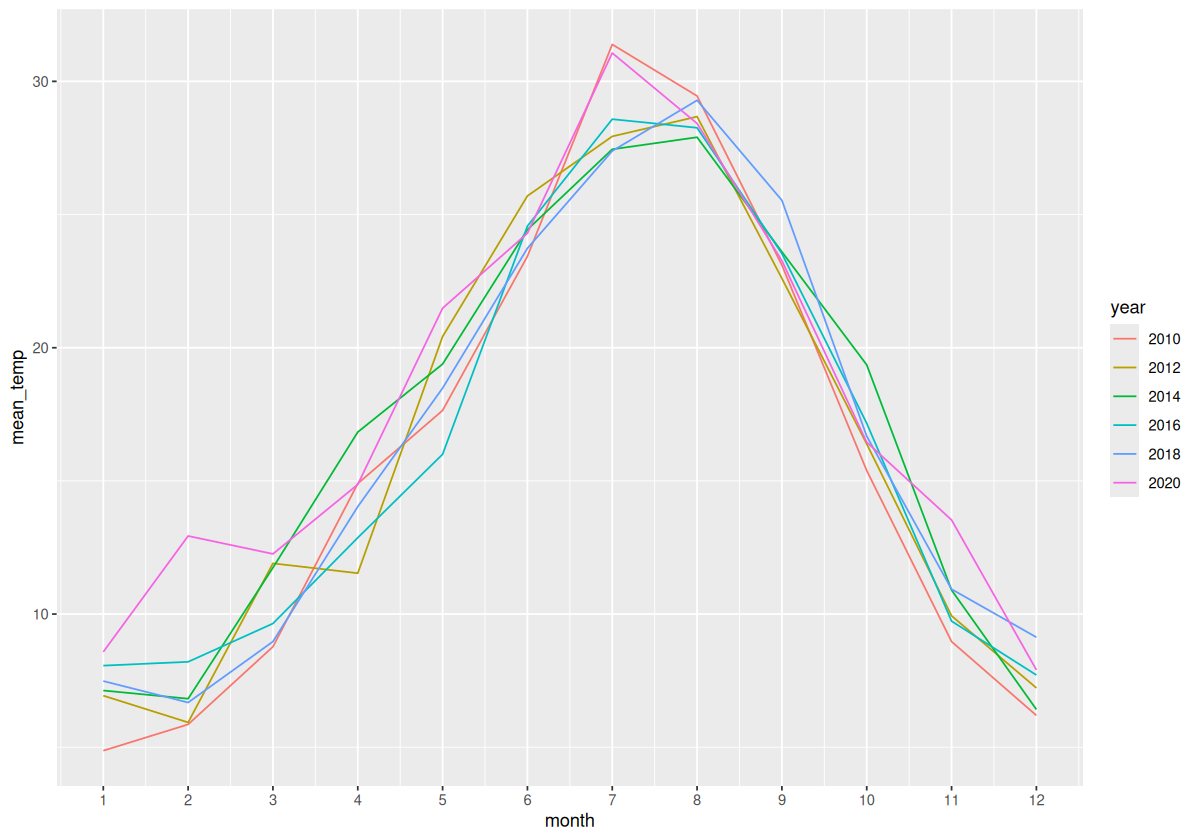

In [173]:
madrid_weather_monthly |>
  ggplot(aes(x = month, y = mean_temp, colour = year)) +
  geom_line() +
  scale_x_continuous(breaks = seq(month.abb))

#### 1.5 Finalise the plot
Update the labels for x, y and colour

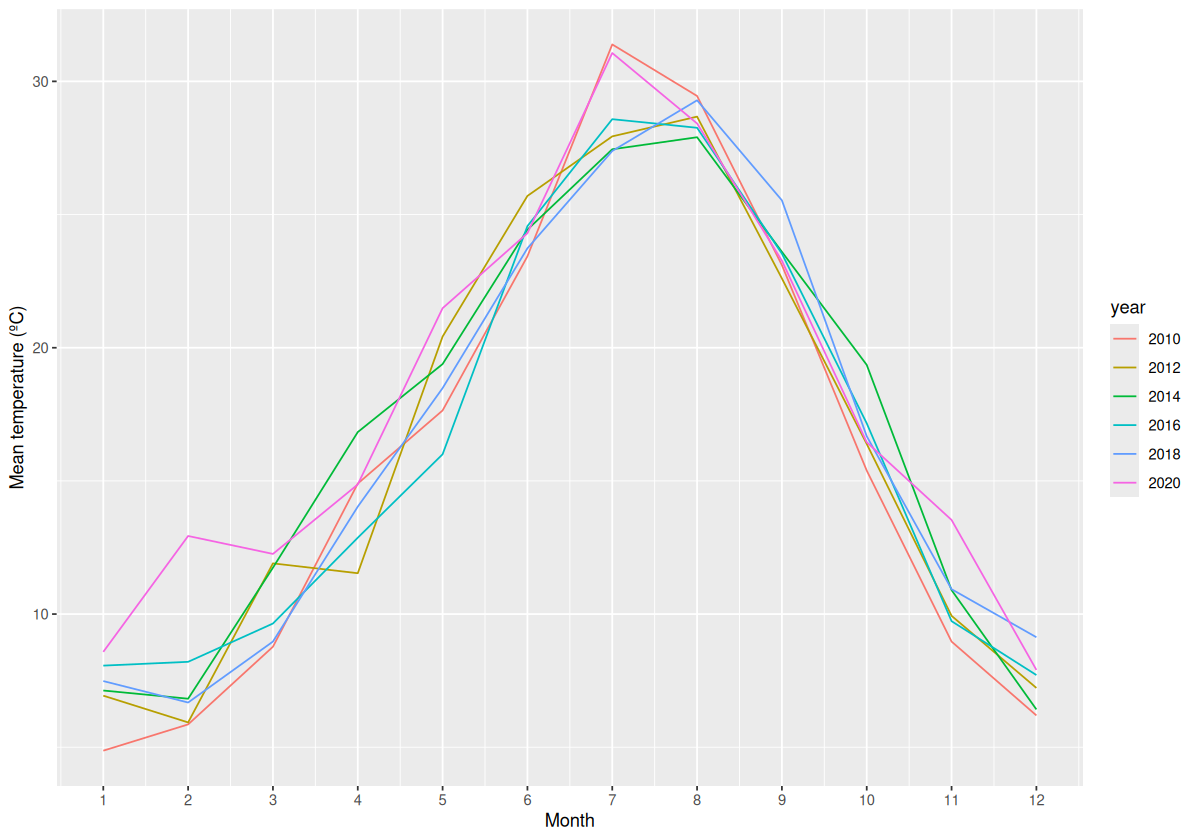

In [174]:
madrid_weather_monthly %>% 
  ggplot(aes(x = month, y = mean_temp, colour = year)) +
  geom_line() +
  scale_x_continuous(breaks = seq(month.abb)) +
  labs(x = "Month", y = "Mean temperature (ºC)")

#### 1.6 Export the plot
Use ggsave to export the plots as "madrid_monthly_temperature.png" in the "outputs"\
folder\
Examine it outside of RStudio.

In [175]:
ggsave(filename = "../outputs/madrid_monthly_temperature.png")

Saving 7 x 7 in image


---
## 2. Extra exercises
lung_disease_deaths.tsv contains monthly deaths from bronchitis, emphysema and 
asthma in the UK, 1974–1979, for males and females.
Make a line plot of the month deaths by year and gender.
You will need think about:
- dataset shape
- unique groups
- controlling value ordering .. month.abb can help you here.

In [176]:
deaths <-
  read_delim("../data/lung_disease_deaths.tsv")

Rows: 12 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Gender
dbl (13): Year, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [177]:
head(deaths, n = 3)

Year,Gender,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1974,M,2134,1863,1877,1877,1492,1249,1280,1131,1209,1492,1621,1846
1975,M,2103,2137,2153,1833,1403,1288,1186,1133,1053,1347,1545,2066
1976,M,2020,2750,2283,1479,1189,1160,1113,970,999,1208,1467,2059


***->Data is in a wide format, so let's transform it into long format. Also, make the 'Gender' and 'Month' variables factor-type.***

In [178]:
deaths_long <- deaths |>
  pivot_longer(
               cols = all_of(month.abb),
               names_to = "Month",
               values_to = "Count") |>
  mutate(Gender = factor(Gender), Month = factor(Month, levels = month.abb))

***-> Now, let's plot the data by 'Year' and 'Gender***

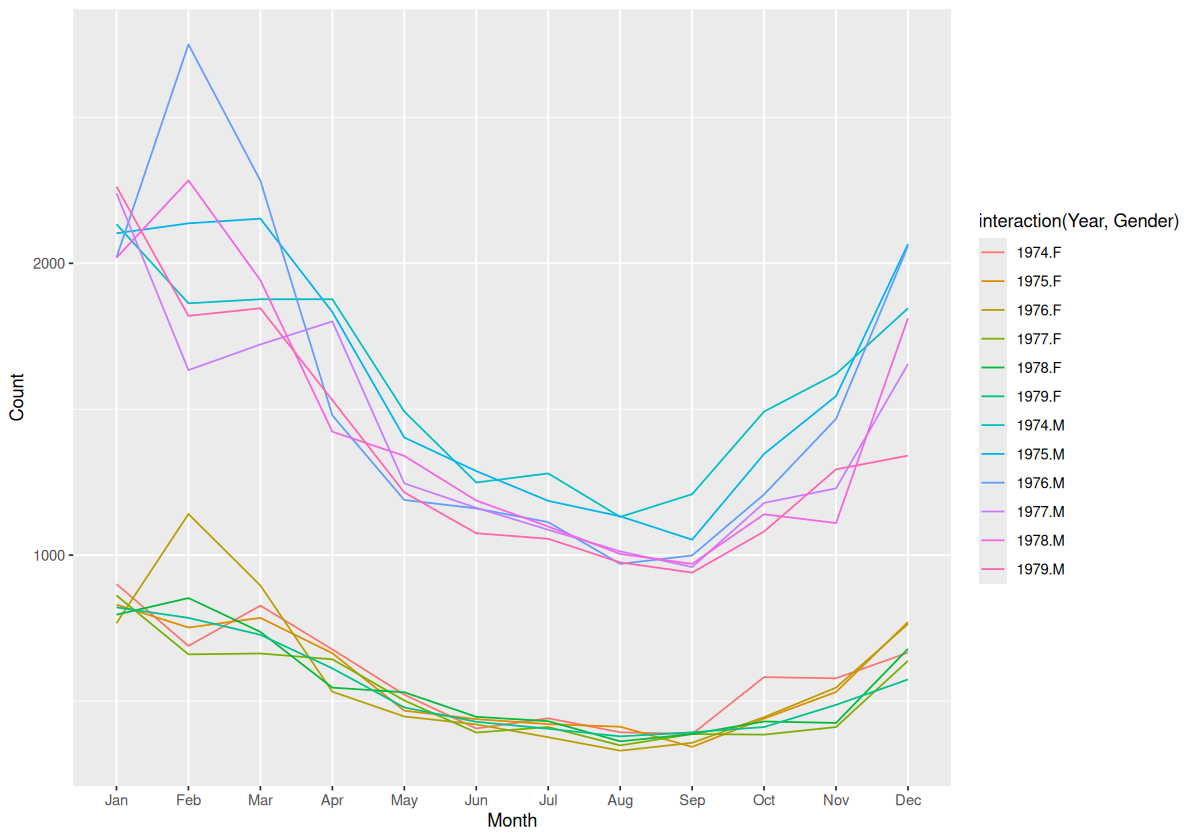

In [179]:
deaths_long |>
  ggplot(aes(
             x = Month,
             y = Count,
             group = interaction(Year, Gender),
             colour = interaction(Year, Gender))) +
  geom_line()


What trend in the data do you see?\
***->Deaths count is higher in males, it peaks around February and bottoms around August. It also slightly seems to decrease over the years.***\
Which months do most deaths occur?\
***->Around February***\
Is it different between sexes?\
***->Yes, quite obvious***\
Are there differences across years?\
***->Mainly for man, but it seems that deaths tend to decrease over the years for both genders***

---
## Conclusion -
We looked at
- line plots
- grouping with group and colour
- creating groups (factors) out of numeric data
- altering the xaxis